Step 1. Clustering Meters using K-Means

This process creates CustomerPopulations and CustomerClusters, which can be found in the admin console at http://localhost:8000/admin/customer/.

In [1]:
import os, sys
PWD = os.getenv('PWD')
os.chdir(PWD)
sys.path.insert(0, os.getenv('PWD'))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "local_settings.py")
import django
django.setup()

In [2]:
from beo_datastore.libs.intervalframe import ValidationFrame288
from beo_datastore.libs.plot_intervalframe import plot_frame288, plot_many_frame288s

from load.customer.models import CustomerPopulation, CustomerCluster
from load.openei.models import ReferenceMeter

In [3]:
# OpenEI Reference Buildings
meters = ReferenceMeter.objects.all()

# Create Clusters using an existing cluster
# cluster = CustomerCluster.objects.get(id=1)
# meters = cluster.meters.all()

# Set number of clusters
number_of_clusters = 16

# choices are "average_frame288", "minimum_frame288", "maximum_frame288", "total_frame288", "count_frame288"
frame288_type = "average_frame288"
normalize = True  # True to normalize to -1 to 1 range

# run K-Means clustering algorithm
customer_population = CustomerPopulation.generate(
    name="OpenEI Reference Buildings",
    meters=meters,
    frame288_type=frame288_type,
    number_of_clusters=number_of_clusters,
    normalize=normalize
)

number of meters: 71


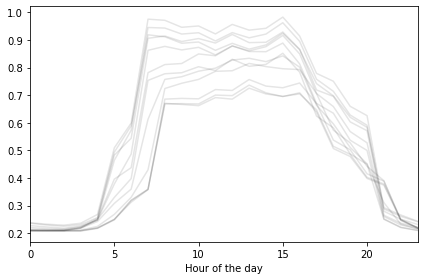

number of meters: 78


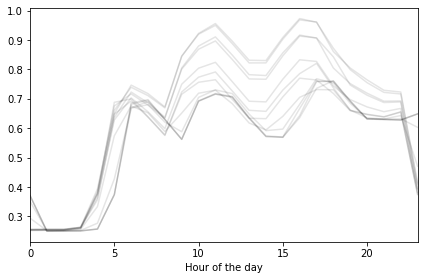

number of meters: 74


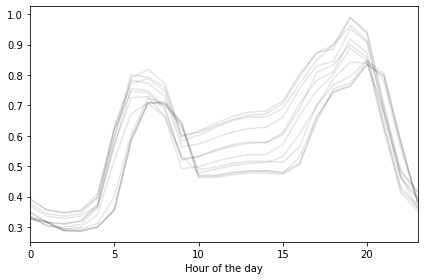

number of meters: 77


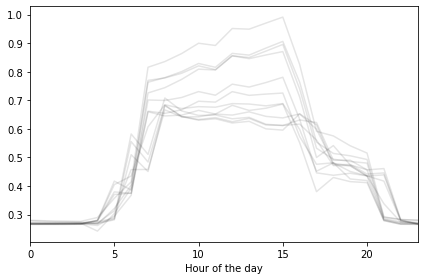

number of meters: 67


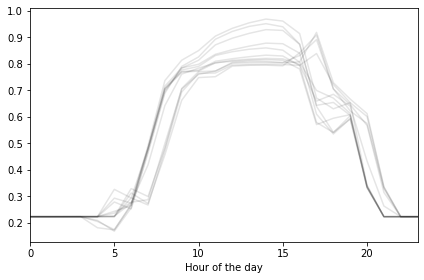

number of meters: 72


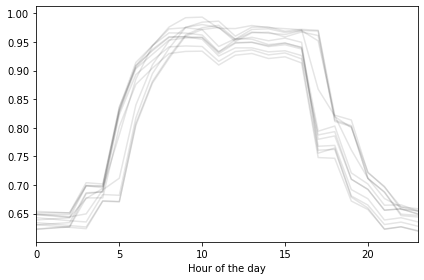

number of meters: 73


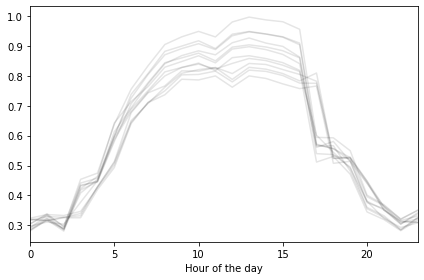

number of meters: 73


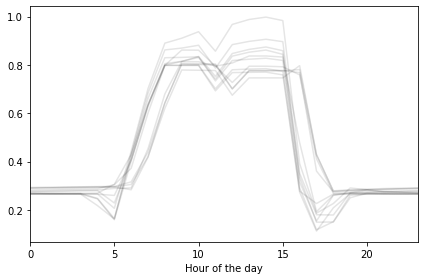

number of meters: 73


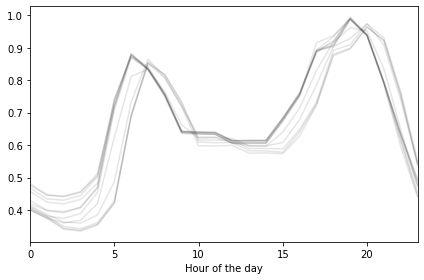

number of meters: 51


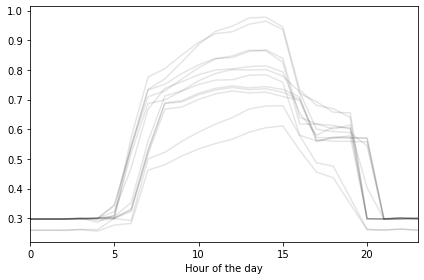

number of meters: 64


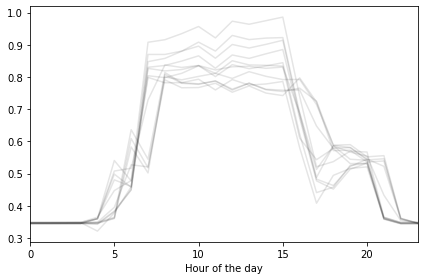

number of meters: 96


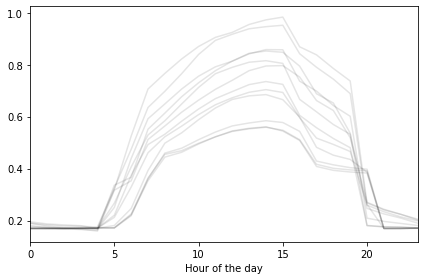

number of meters: 74


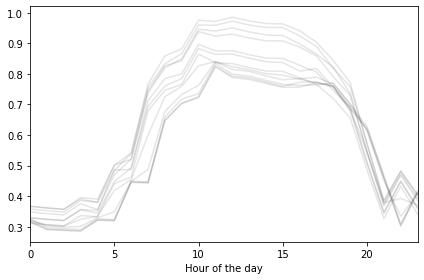

number of meters: 85


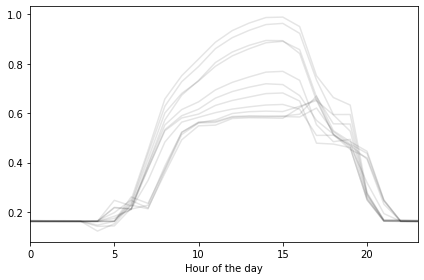

number of meters: 67


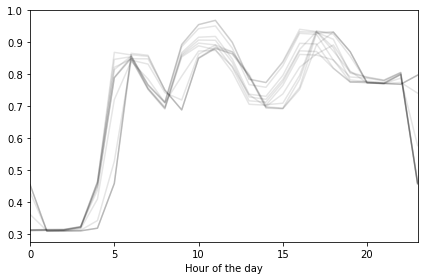

number of meters: 73


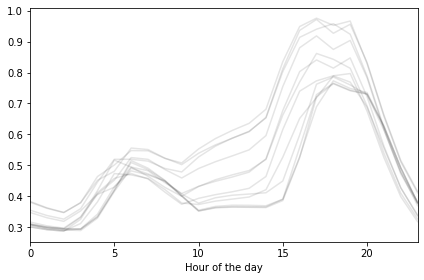

In [4]:
# plot reference load cluster

for customer_cluster in customer_population.customer_clusters.all():
    print("number of meters: {}".format(customer_cluster.meter_count))
    plot_frame288(customer_cluster.frame288)